Dataset link -> https://www.kaggle.com/johnsmith88/heart-disease-dataset

**This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.**

# Content
# Attribute Information:

age

sex

chest pain type (4 values)

resting blood pressure

serum cholestoral in mg/dl

fasting blood sugar > 120 mg/dl

resting electrocardiographic results (values 0,1,2)

maximum heart rate achieved

exercise induced angina

oldpeak = ST depression induced by exercise relative to rest

the slope of the peak exercise ST segment

number of major vessels (0-3) colored by flourosopy

thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [1]:
!pip install modin


     |████████████████████████████████| 970 kB 14.4 MB/s            
     |████████████████████████████████| 962 kB 47.7 MB/s            
     |████████████████████████████████| 957 kB 65.3 MB/s            
     |████████████████████████████████| 956 kB 47.5 MB/s            
     |████████████████████████████████| 956 kB 45.9 MB/s            
     |████████████████████████████████| 761 kB 47.0 MB/s            
     |████████████████████████████████| 11.3 MB 43.5 MB/s            
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.4
    Uninstalling pandas-1.3.4:
      Successfully uninstalled pandas-1.3.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 3.1.4 requires google-cloud-bigquery-storage, which is not installed.
tfx-bsl 1.4.0 requires absl-py<0.13,>=0.9, but you have absl-py 0.15.0 which is incompatible.
tfx-bs

In [2]:
!pip install scikit-learn-intelex


     |████████████████████████████████| 115 kB 14.8 MB/s            
     |████████████████████████████████| 13.7 MB 674 kB/s            
     |████████████████████████████████| 69.2 MB 77 kB/s              
     |████████████████████████████████| 4.0 MB 55.6 MB/s            


In [3]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [4]:
# Importing libraries
import modin.pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import time

In [5]:
# Reading data
df = pd.read_csv("../input/heart-disease-dataset/heart.csv")
%time

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 9.54 µs


In [6]:
df.head()
%time

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 10.5 µs


In [7]:
df.info()
%time

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  --------  --------------  -----  
 0   age       1025 non-null   int64
 1   sex       1025 non-null   int64
 2   cp        1025 non-null   int64
 3   trestbps  1025 non-null   int64
 4   chol      1025 non-null   int64
 5   fbs       1025 non-null   int64
 6   restecg   1025 non-null   int64
 7   thalach   1025 non-null   int64
 8   exang     1025 non-null   int64
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64
 11  ca        1025 non-null   int64
 12  thal      1025 non-null   int64
 13  target    1025 non-null   int64
dtypes: int64(13), float64(1)
memory usage: 112.2 KB
CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 11.7 µs


In [8]:
df.isnull().sum()
%time

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 11.4 µs


In [9]:
df.shape
%time

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10.3 µs


In [10]:
# checking dataset is balanced or not
target_true_count = len(df.loc[df['target'] == 1])
target_false_count = len(df.loc[df['target'] == 0])
%time

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs


In [11]:
target_true_count, target_false_count

(526, 499)

In [12]:
# plotting graph for output classes counts
# sns.countplot(x = 'target',data = df)

In [13]:
df.describe()
%time

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.58 µs


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 9.06 µs


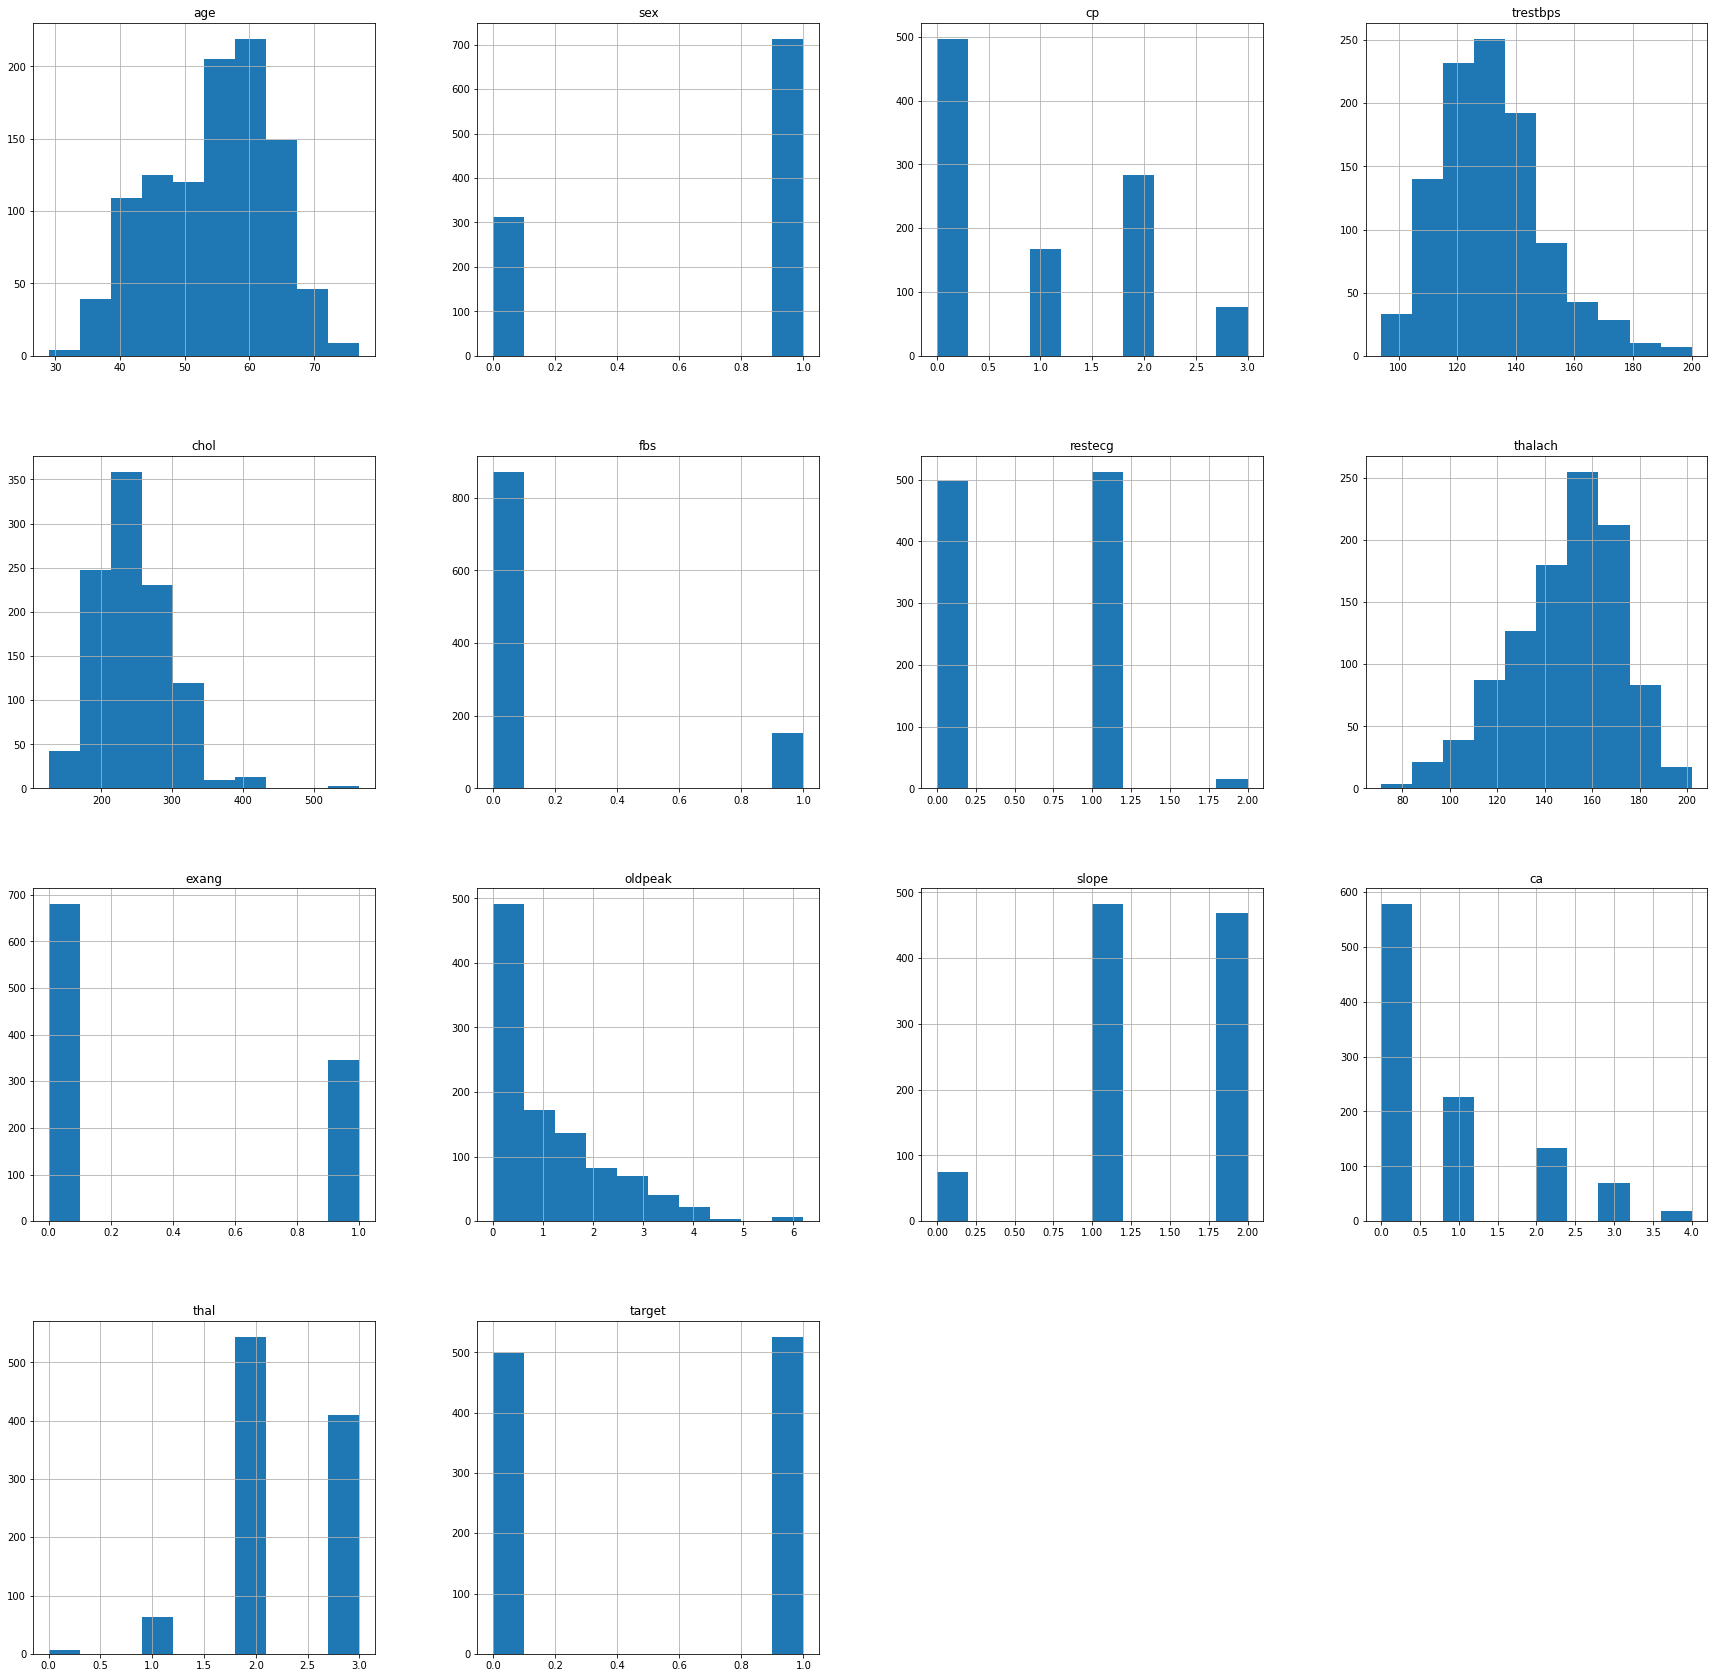

In [14]:
# plotting variation graphs for each property
df.hist(figsize = (30,30))
%time

In [15]:
df.corr()
%time

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.82 µs


CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs


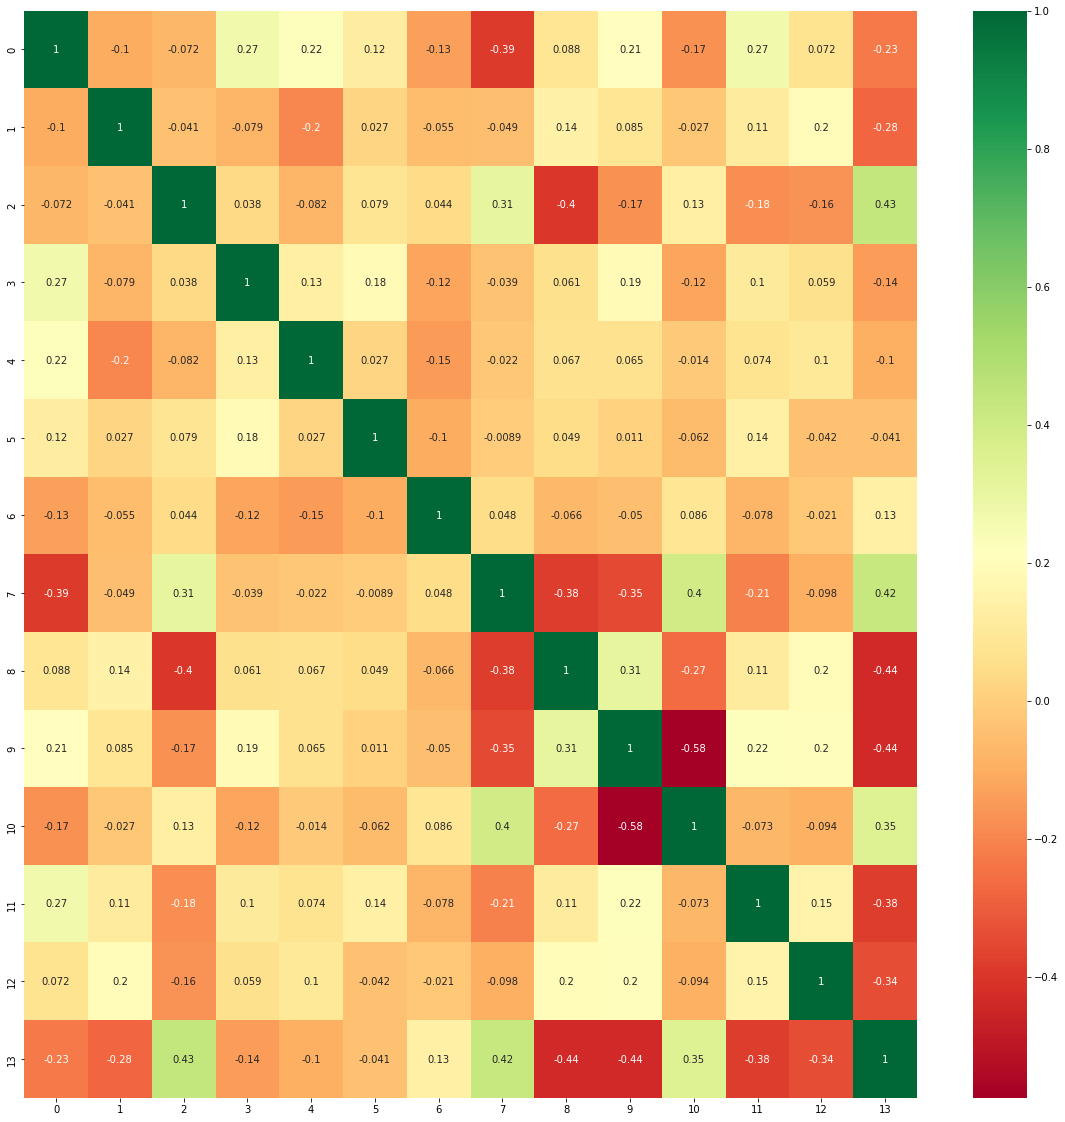

In [16]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
%time

In [17]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

##### Checking if data has 0 values present

In [18]:
print("Age: {0}".format(len(df.loc[df['age'] == 0])))
print("gender: {0}".format(len(df.loc[df['sex'] == 0])))
print("chest pain type: {0}".format(len(df.loc[df['cp'] == 0])))
print("resting blood pressure: {0}".format(len(df.loc[df['trestbps'] == 0])))
print("serum cholestoral: {0}".format(len(df.loc[df['chol'] == 0])))
print("fasting blood sugar: {0}".format(len(df.loc[df['fbs'] == 0])))
print("resting electrocardiographic results: {0}".format(len(df.loc[df['restecg'] == 0])))
print("maximum heart rate achieved: {0}".format(len(df.loc[df['thalach'] == 0])))
print("exercise induced angina: {0}".format(len(df.loc[df['exang'] == 0])))
print("oldpeak : {0}".format(len(df.loc[df['oldpeak'] == 0])))
print("the slope of the peak exercise ST segment: {0}".format(len(df.loc[df['slope'] == 0])))
print("number of major vessels (0-3) colored by flourosopy: {0}".format(len(df.loc[df['ca'] == 0])))
print("thal: {0}".format(len(df.loc[df['thal'] == 0])))

Age: 0
gender: 312
chest pain type: 497
resting blood pressure: 0
serum cholestoral: 0
fasting blood sugar: 872
resting electrocardiographic results: 497
maximum heart rate achieved: 0
exercise induced angina: 680
oldpeak : 329
the slope of the peak exercise ST segment: 74
number of major vessels (0-3) colored by flourosopy: 578
thal: 7


##### preparing the data

In [19]:
from sklearn.model_selection import train_test_split
feature_columns = ['age', 'sex', 'cp','trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang' , 'oldpeak', 'slope', 'ca', 'thal']
predicted_class = ['target']
%time

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 12.2 µs


In [20]:
X = df[feature_columns]
y = df[predicted_class]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)
%time

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 9.78 µs


In [21]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((717, 13), (717, 1), (308, 13), (308, 1))

##### filling in 0 values

In [22]:
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=0, strategy="mean")

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)
%time

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.06 µs


In [23]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

model = random_forest_model.fit(X_train, y_train)
%time

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.06 µs


In [24]:
predict_train_data = model.predict(X_test)

from sklearn import metrics

print("Accuracy Using Intel OneAPI = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))
%time

Accuracy Using Intel OneAPI = 0.961
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 26.9 µs


In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict_train_data)
cm
%time

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 9.54 µs


In [26]:
import joblib
joblib.dump(model, "./random_forest_heart_Oneapi.joblib")
%time

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.78 µs


In [27]:
from xgboost import XGBClassifier
xg_model = XGBClassifier(random_state=42)

model_1 = xg_model.fit(X_train, y_train)
%time

[07:59:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 10.3 µs


In [28]:
predict_train_data = model_1.predict(X_test)

print("Accuracy Using OneAPI= {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))
%time

Accuracy Using OneAPI= 0.951
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10.7 µs


In [29]:
cm = confusion_matrix(y_test, predict_train_data)
cm
%time

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.82 µs


In [30]:
joblib.dump(model_1, "./XGboost_Oneapi.joblib")
%time

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.78 µs
